In [2]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
imgs = []
for i in range(7):
    img = Image.open(f'segments/seg{i}.png')
    img.load()
    imgs.append(np.asarray(img, dtype="int32"))


In [16]:
imgs = np.array(imgs)
imgs.shape

(7, 256, 176, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..1785].


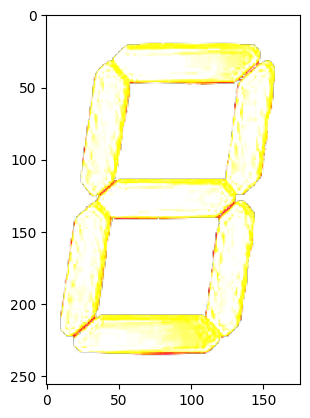

In [20]:
plt.imshow(imgs.sum(0))

In [ ]:
imgs[]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
training_set = [
    (np.array([1.,1.,1.,1.,1.,1.,0.]), 0), 
    (np.array([0.,0.,0.,0.,1.,1.,0.]), 1), 
    (np.array([1.,1.,0.,1.,1.,0.,1.]), 2), 
    (np.array([1.,0.,0.,1.,1.,1.,1.]), 3), 
    (np.array([0.,0.,1.,0.,1.,1.,1.]), 4), 
    (np.array([1.,0.,1.,1.,0.,1.,1.]), 5), 
    (np.array([1.,1.,1.,1.,0.,1.,1.]), 6), 
    (np.array([1.,1.,1.,0.,0.,1.,1.]), 6), # 6 v2
    (np.array([0.,0.,0.,1.,1.,1.,0.]), 7), 
    (np.array([1.,1.,1.,1.,1.,1.,1.]), 8), 
    (np.array([1.,0.,1.,1.,1.,1.,1.]), 9), 
    (np.array([0.,0.,1.,1.,1.,1.,1.]), 9), # 9 v2
]

In [37]:
imgs.shape

(7, 256, 176, 4)

255.0


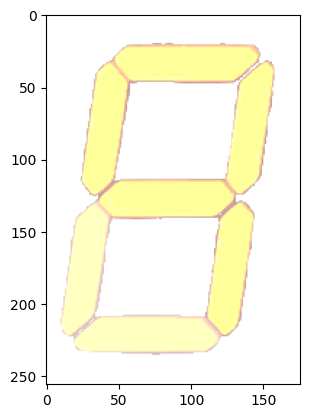

In [82]:
v = training_set[11][0]
sum_img = np.einsum('i,ijkl->jkl',v, imgs)//v.sum()
print(sum_img.max())
sum_img[sum_img>160] = 255
sum_img[sum_img<50] = 0
#sum_img[(sum_img>50) * (sum_img<250)] = 50
plt.imshow(sum_img.astype(int))


(array([28931.,   297.,   519.,   619.,   528.,   570.,   663.,   865.,
         9931.,  2133.]),
 array([  0.  ,  17.85,  35.7 ,  53.55,  71.4 ,  89.25, 107.1 , 124.95,
        142.8 , 160.65, 178.5 ]),
 <BarContainer object of 10 artists>)

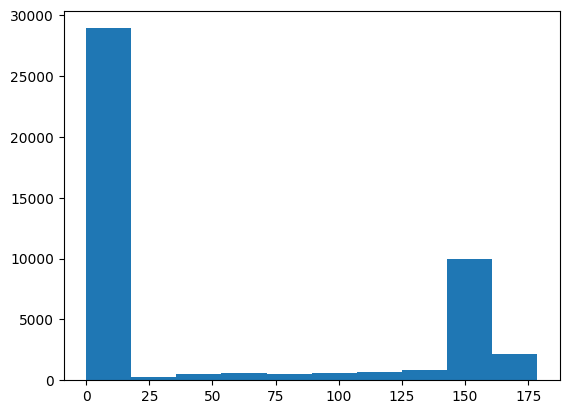

In [56]:
plt.hist(sum_img.sum(-1).flatten()/4)